In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time
import copy
from matplotlib import rc
from IPython import display
import random as rnd
%matplotlib inline

In [2]:
### PARAMETERS ###
updateInterval = 200
epochs = 10
world_size = 100
group_size = 2

alive = 1
dead = 0

In [3]:
def init_grid(size): 
    return np.random.choice([0,1], size*size, p=[0.9, 0.1]).reshape(size, size) 

In [4]:
world = init_grid(world_size)
group = init_grid(group_size)

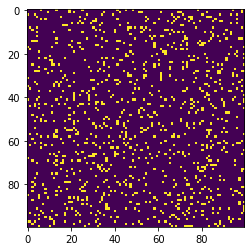

In [5]:
### PLOT INITIAL STATE
plt.imshow(world)
plt.show()

In [6]:
## FUNCTIONS TO PASS FROM SPARSE TO MATRIX REPRESENTATION AND VICE VERSA

## TAKE GRID (0 and 1) AS INPUT, RETURN LIST (of coordinates)
def grid_to_list(grid):
    population = np.argwhere(grid).tolist()
    return population

def grid_to_set(grid):
    population = np.argwhere(grid).tolist()
    population = tuple(map(tuple, population))
    population = set(population)
    return population
## TAKE LIST (of coordinates) AS INPUT, RETURN GRID (of 0 and 1)
def list_to_grid(population, world_size):
    new_grid = np.zeros((world_size, world_size))
    row_indices = population[:,0]
    col_indices = population[:,1]
    new_grid[row_indices,col_indices] = 1
    return new_grid

def set_to_grid(population, world_size):
    new_grid = np.zeros((world_size, world_size))
    population = list(population)
    population = np.array(population, dtype = int)
    row_indices = population[:,0]
    col_indices = population[:,1]
    new_grid[row_indices,col_indices] = 1
    return new_grid

In [7]:
alive_cells = grid_to_set(world)

In [8]:
## Receive in input the coords of an alive cell
## returns the coords of its neighbors
## uses periodic boundary conditions
def get_neighbours(element, world_size):
    l = []
    l.append( ( (element[0]-1)%world_size, (element[1]  )%world_size ) )
    l.append( ( (element[0]-1)%world_size, (element[1]+1)%world_size ) )
    l.append( ( (element[0]-1)%world_size, (element[1]-1)%world_size ) )
    l.append( ( (element[0]  )%world_size, (element[1]+1)%world_size ) )
    l.append( ( (element[0]  )%world_size, (element[1]-1)%world_size ) )
    l.append( ( (element[0]+1)%world_size, (element[1]+1)%world_size ) )
    l.append( ( (element[0]+1)%world_size, (element[1]-1)%world_size ) )
    l.append( ( (element[0]+1)%world_size, (element[1]  )%world_size ) )
    return l

In [9]:
## SET OF RULES ON SPARSE SET
def apply_rules(alive_cells, world_size):
    counter = {}
    for cell in alive_cells:
        if cell not in counter: ## You don't want to look twice at the same cell
            counter[cell] = 0   ## Initialize counter for alive cells
        neighbours = get_neighbours(cell, world_size) ## Obtain a LIST containing the coordinates of neighbours
        for n in neighbours:
            if n not in counter: ## Cells not in the counter are currently dead
                counter[n] = 1   ## Initialize them with 1 (the current neighbour)
            else:                ## Cells already in the counter are alive
                counter[n] += 1  ## Increment their counter by one
    for c in counter:            ## Now look at the newly created list and apply rules
        if (counter[c] < 2 or counter[c] > 3):
            alive_cells.discard(c)
        if (counter[c] == 3):
            alive_cells.add(c)   ## Add or discard cells according to rules
    return  

In [10]:
## FUNCTION WHICH MAKES THE TIME STEP
def time_step(alive_cells, world_size):
    start = time.time()
    apply_rules(alive_cells, world_size)
    new_world = set_to_grid(alive_cells, world_size)
    finish = time.time()
    duration = finish - start
    print("Step peformed in ", duration, " seconds")
    return new_world

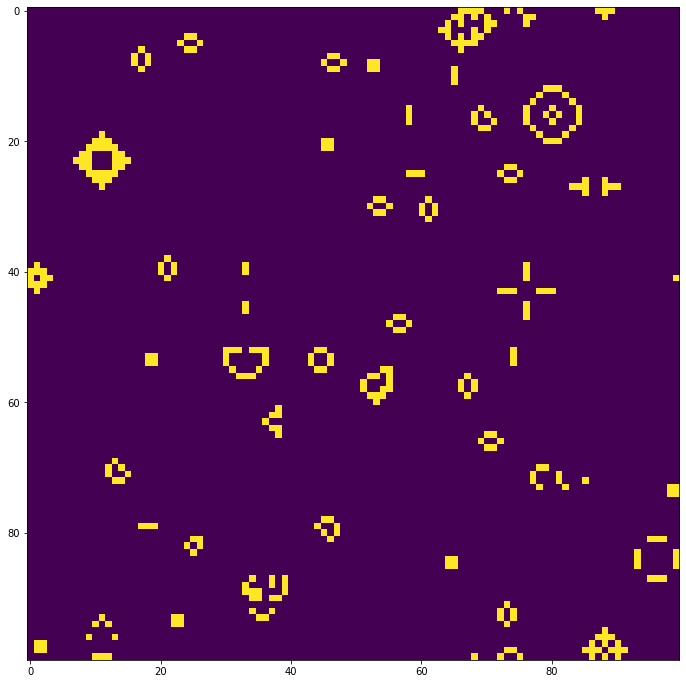

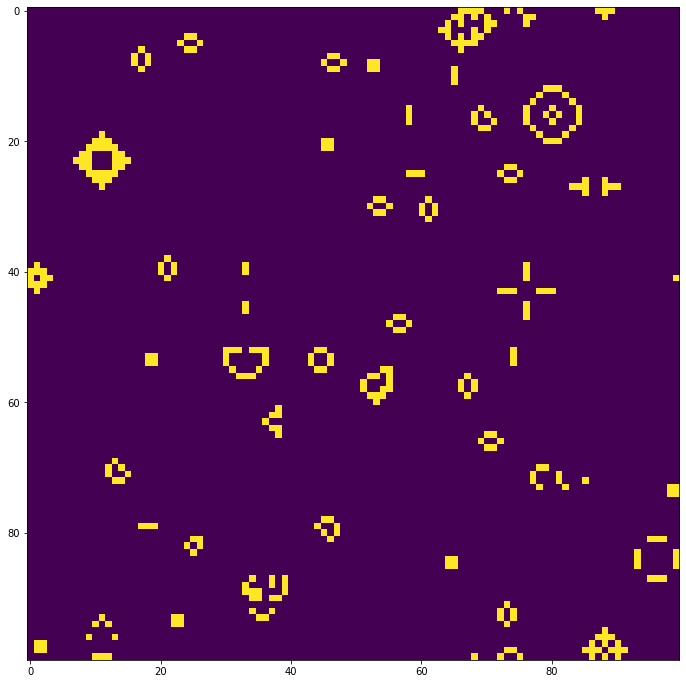

In [11]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(14, 12))
fig.canvas.draw()
img = ax.imshow(world, interpolation='none') 
for i in range(epochs):
    new_world = time_step(alive_cells, world_size)
    img.set_data(new_world)
    display.clear_output(wait=True)
    display.display(fig)
    time.sleep(0.000001)